In [1]:
import pandas as pd
import gensim
from zipfile import ZipFile
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

C:\Users\selma\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file = "data.zip"
with ZipFile(file, 'r') as zip: 
    zip.extractall('data')

In [3]:
df_tweets = pd.read_csv('data/out.csv')
df_tweets['label'] = df_tweets['label'].astype(int)
df_tweets = df_tweets[:1000]
df_tweets

,lang,possibly_sensitive,text,created_at,label
0,en,False,russia terror attack today let give incrementa...,2023-01-15 16:20:32,-1
1,en,False,would normally front page news identical terro...,2023-01-15 16:20:32,-1
2,en,False,gaza ukraine anyone care,2023-01-15 16:20:32,1
3,en,False,classified documents found joe biden private o...,2023-01-15 16:20:32,1
4,en,False,wholesale gas prices russia invaded ukraine te...,2023-01-15 16:20:32,0
...,...,...,...,...,...
995,en,False,ukraine forces retain control soledar despite ...,2023-01-15 16:18:22,0
996,en,False,ask people ukraine syria join iranians rally f...,2023-01-15 16:18:22,1
997,en,False,ukraine forced destroy tu strategic bombers st...,2023-01-15 16:18:22,-1
998,en,False,one day great novelists amp poets give us art ...,2023-01-15 16:18:21,1


In [4]:
df_tweets = df_tweets.dropna()
Y = df_tweets['label']
X = df_tweets['text']

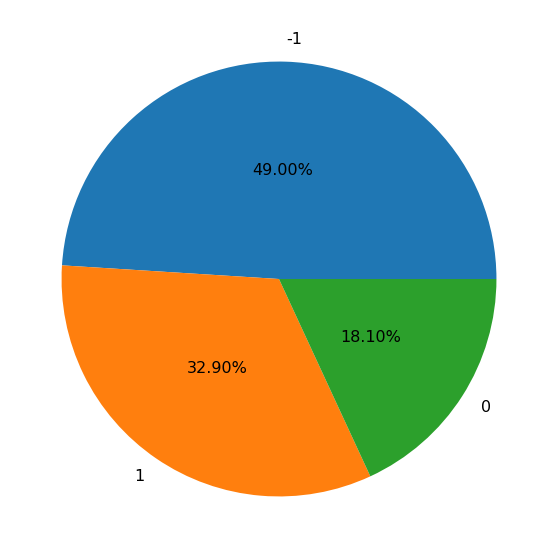

In [5]:
pie, ax = plt.subplots(figsize=[15,10])
plt.pie(x = Y.value_counts(), autopct='%.2f%%', labels=list(Y.unique().astype('str')), pctdistance=0.5, textprops={'fontsize': 16})
plt.show()

# First approach: use TFIDF

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()
oneVsone_logreg = OneVsOneClassifier(LogisticRegression())

In [7]:
#comparaison online/batch:
X_counts = count_vect.fit_transform(X)
X_tfidf = tfidf_transformer.fit_transform(X_counts).todense()
model1 = neigh.fit(X_tfidf, Y)
display(HTML("<h1>kNN</h1>"))
display(HTML("<h3>All the dataset trained: Results</h3>"))
model_prediction = model1.predict(X_tfidf)
print('weighted f1 score %s' % f1_score(Y, model_prediction, average='weighted'))
print(classification_report(Y, model_prediction))

C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


weighted f1 score 0.8048374568654817
              precision    recall  f1-score   support

          -1       0.79      0.91      0.85       490
           0       0.73      0.70      0.71       181
           1       0.89      0.71      0.79       329

    accuracy                           0.81      1000
   macro avg       0.80      0.77      0.78      1000
weighted avg       0.81      0.81      0.80      1000



C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [8]:
#See if the model is underfitting/ overfitting:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train_counts2 = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)
X_train_tfidf2 = tfidf_transformer.fit_transform(X_train_counts2).todense()
X_test_tfidf = tfidf_transformer.transform(X_test_counts).todense()
model2 = neigh.fit(X_train_tfidf2, Y_train)
display(HTML("<h1>kNN</h1>"))
display(HTML("<h3>Train data results</h3>"))
model_prediction2 = model2.predict(X_train_tfidf2)
print('weighted f1 score %s' % f1_score(Y_train, model_prediction2, average='weighted'))
print(classification_report(Y_train, model_prediction2))
display(HTML("<h3>Test data results</h3>"))
model_prediction_test = model2.predict(X_test_tfidf)
print('weighted f1 score %s' % f1_score(Y_test, model_prediction_test, average='weighted'))
print(classification_report(Y_test, model_prediction_test))

C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


weighted f1 score 0.7868823231775172
              precision    recall  f1-score   support

          -1       0.77      0.89      0.83       334
           0       0.72      0.66      0.69       120
           1       0.87      0.70      0.78       216

    accuracy                           0.79       670
   macro avg       0.79      0.75      0.77       670
weighted avg       0.79      0.79      0.79       670



weighted f1 score 0.70696864746043
              precision    recall  f1-score   support

          -1       0.69      0.88      0.77       156
           0       0.59      0.44      0.50        61
           1       0.84      0.64      0.72       113

    accuracy                           0.72       330
   macro avg       0.71      0.65      0.67       330
weighted avg       0.72      0.72      0.71       330



C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [9]:
#comparaison online/batch:
model_logreg = oneVsone_logreg.fit(X_tfidf, Y)
display(HTML("<h1>oneVsone_logreg</h1>"))
display(HTML("<h3>All the dataset trained: Results</h3>"))
model_prediction_lr = model_logreg.predict(X_tfidf)
print('weighted f1 score %s' % f1_score(Y, model_prediction_lr, average='weighted'))
print(classification_report(Y, model_prediction_lr))

C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


weighted f1 score 0.8959406650529741
              precision    recall  f1-score   support

          -1       0.83      1.00      0.91       490
           0       1.00      0.60      0.75       181
           1       1.00      0.92      0.96       329

    accuracy                           0.90      1000
   macro avg       0.94      0.84      0.87      1000
weighted avg       0.92      0.90      0.90      1000



C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [10]:
#See if the model is underfitting/ overfitting:
model2_lr = model_logreg.fit(X_train_tfidf2, Y_train)
display(HTML("<h1>oneVsone_logreg</h1>"))
display(HTML("<h3>Train data results</h3>"))
model_prediction2_lr = model2_lr.predict(X_train_tfidf2)
print('weighted f1 score %s' % f1_score(Y_train, model_prediction2_lr, average='weighted'))
print(classification_report(Y_train, model_prediction2_lr))
display(HTML("<h3>Test data results</h3>"))
model_prediction_test_lr = model2_lr.predict(X_test_tfidf)
print('weighted f1 score %s' % f1_score(Y_test, model_prediction_test_lr, average='weighted'))
print(classification_report(Y_test, model_prediction_test_lr))

C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


weighted f1 score 0.8345681254414153
              precision    recall  f1-score   support

          -1       0.77      1.00      0.87       334
           0       1.00      0.40      0.57       120
           1       1.00      0.87      0.93       216

    accuracy                           0.85       670
   macro avg       0.92      0.76      0.79       670
weighted avg       0.88      0.85      0.83       670



C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


weighted f1 score 0.654865936771163
              precision    recall  f1-score   support

          -1       0.61      0.99      0.75       156
           0       1.00      0.16      0.28        61
           1       0.98      0.57      0.72       113

    accuracy                           0.69       330
   macro avg       0.86      0.57      0.59       330
weighted avg       0.81      0.69      0.65       330



C:\Users\selma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


# Second approach: use embeddings

In [11]:
#identify the semantics and contextual information with embeddings:
from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [12]:
vocab_size = 300
X_train = [one_hot(d, vocab_size) for d in X_train]
X_test = [one_hot(d, vocab_size) for d in X_test]
X = [one_hot(d, vocab_size) for d in X]
max_length = 25
X_train = pad_sequences(X_train, maxlen=max_length, padding='pre')
X_test = pad_sequences(X_test, maxlen=max_length, padding='pre')
X = pad_sequences(X, maxlen=max_length, padding='pre')

In [13]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 1000, input_length=max_length))
model.add(Flatten())

model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=[get_f1])

X_train_embeddings = model.predict(X_train)
X_test_embeddings = model.predict(X_test)
X_embeddings = model.predict(X)

32/32 [==============================] - 0s 2ms/step


In [15]:
X_train_embeddings.shape

(670, 25000)

In [16]:
#comparaison online/batch:
model_logreg = oneVsone_logreg.fit(X_embeddings, Y)
display(HTML("<h1>oneVsone_logreg</h1>"))
display(HTML("<h3>All the dataset trained: Results</h3>"))
model_prediction_lr = model_logreg.predict(X_embeddings)
print('weighted f1 score %s' % f1_score(Y, model_prediction_lr, average='weighted'))
print(classification_report(Y, model_prediction_lr))

weighted f1 score 0.9970016472942955
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       490
           0       0.99      1.00      0.99       181
           1       1.00      1.00      1.00       329

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [17]:
model2_lr_embed = model_logreg.fit(X_train_embeddings, Y_train)
display(HTML("<h1>oneVsone_logreg with embeddings</h1>"))
display(HTML("<h3>Train data results</h3>"))
model_prediction2_lr_embed = model2_lr_embed.predict(X_train_embeddings)
print('weighted f1 score %s' % f1_score(Y_train, model_prediction2_lr_embed, average='weighted'))
print(classification_report(Y_train, model_prediction2_lr_embed))
display(HTML("<h3>Test data results</h3>"))
model_prediction_test_lr_embed = model2_lr_embed.predict(X_test_embeddings)
print('weighted f1 score %s' % f1_score(Y_test, model_prediction_test_lr_embed, average='weighted'))
print(classification_report(Y_test, model_prediction_test_lr_embed))

weighted f1 score 0.9985080673271995
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       334
           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       216

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670



weighted f1 score 0.685381322075537
              precision    recall  f1-score   support

          -1       0.67      0.89      0.77       156
           0       0.61      0.44      0.51        61
           1       0.81      0.57      0.67       113

    accuracy                           0.70       330
   macro avg       0.70      0.63      0.65       330
weighted avg       0.71      0.70      0.69       330

